In [1]:
import json
import parse
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
file = "../training/2ac-config-segmented-100-set0-invertedYes-centerNo.json"
f = open(file)
data = json.load(f)

In [81]:
data['stimuli'][1]
# print (sdata.keys())

{'name': '0oq8ifcb-30_btwmt59w2-100',
 'frequency': 1,
 'responses': {'peck_left': {'p_reward': 0.8, 'correct': True},
  'peck_right': {'p_punish': 0, 'correct': False},
  'timeout': {'p_punish': 1.0, 'correct': False}}}

In [23]:
behavior = {"stimuli":[],"frequency":[], "foreground": [], 
            "background": [], "snr": [],
           "peck_left": [], "peck_right": [],
            "peck_left_prob": [], "peck_right_prob": [], "timeout": []}
for i in data['stimuli']:
    #####Split apart stimuli name######
    stimulus = parse.compile("{foreground}-{foreground_dBFS:d}_{background}-{background_dBFS:d}")
    parse_result = stimulus.parse(i['name'])
    foreground = parse_result['foreground']
    sl = -abs(parse_result['foreground_dBFS'])
    nl = -abs(parse_result['background_dBFS'])
    snr = sl - nl
    background = parse_result['background']

    ######Append values to behavior dictionary
    behavior['stimuli'].append(i["name"])
    behavior['frequency'].append(i["frequency"])
    behavior['foreground'].append(foreground)
    behavior['background'].append(background)
    behavior['snr'].append(snr)
    
    ######Check for reward for left/right. Values of 1 equal reward#####
    if 'p_reward' in i['responses']['peck_left']:
        behavior['peck_left'].append(1)
        behavior['peck_left_prob'].append(i['responses']['peck_left']['p_reward'])
    elif 'p_reward' in i['responses']['peck_right']:
        behavior['peck_right'].append(1)
        behavior['peck_right_prob'].append(i['responses']['peck_right']['p_reward'])
        
    if 'p_punish' in i['responses']['peck_left']:
        behavior['peck_left'].append(0)
        behavior['peck_left_prob'].append(i['responses']['peck_left']['p_punish'])
    elif 'p_punish' in i['responses']['peck_right']:
        behavior['peck_right'].append(0)
        behavior['peck_right_prob'].append(i['responses']['peck_right']['p_punish'])
    
    if 'p_punish' in i['responses']['timeout']:
        behavior['timeout'].append(0)
    else:
        behavior['timeout'].append(1)
    #####Input result probabilities
print (behavior['peck_left'])
print (behavior['peck_right'])
# print(len(behavior['stimuli']))
# behavior = {"stimuli":[],"frequency":[], "foreground": [], 
#             "background": [], "snr": [],
#            "peck_left": [], "peck_right": [],
#             "peck_left_prob": [], "peck_right_prob": [], "timeout": []}
print (len(behavior['peck_right']))

[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1]
19


In [9]:
df = pd.DataFrame(behavior)
df

ValueError: All arrays must be of the same length

In [106]:
#####Compare probabilities to insure that everything is equal#####
left_sum = sum(df['peck_left_prob'])
right_sum = sum(df['peck_right_prob'])
left_prob = len(df[df['peck_left_prob']==0.8])
right_prob = len(df[df['peck_right_prob']==0.8])
print (left_sum,right_sum,left_prob,right_prob)

7.999999999999999 7.999999999999999 10 10


<BarContainer object of 3 artists>

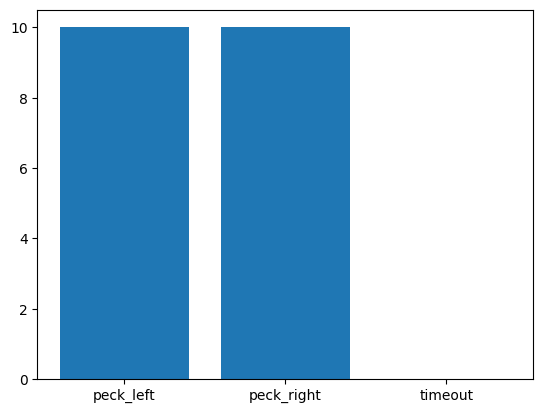

In [107]:
########Responses that are rewarded########
pl = sum(df['peck_left'])
pr = sum(df['peck_right'])
t = sum(df['timeout'])
responses = ['peck_left','peck_right', 'timeout']
count = [pl,pr, t]
plt.bar(responses,count)

In [93]:
smalldf = df.loc[:,['foreground', 'frequency', 'peck_left','peck_right','timeout']]
motifdf = smalldf.groupby('foreground').apply(sum)
motifdf


,foreground,frequency,peck_left,peck_right,timeout
foreground,,,,,
0oq8ifcb,0oq8ifcb0oq8ifcb0oq8ifcb0oq8ifcb0oq8ifcb,5,5,0,0
l1a3ltpy,l1a3ltpyl1a3ltpyl1a3ltpyl1a3ltpyl1a3ltpy,5,0,5,0
vekibwgj,vekibwgjvekibwgjvekibwgjvekibwgjvekibwgj,5,0,5,0
ztqee46x,ztqee46xztqee46xztqee46xztqee46xztqee46x,5,5,0,0


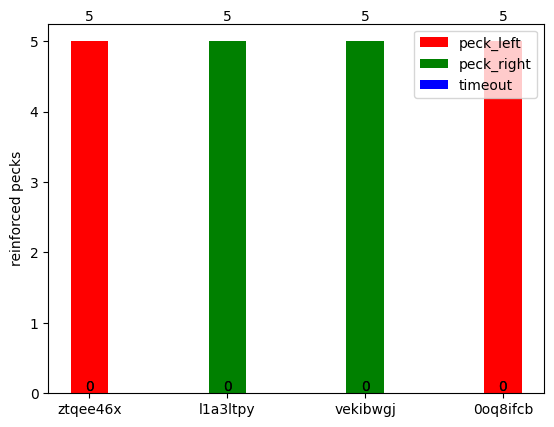

In [94]:
#N = 4
motifs = list(set(df['foreground']))  # the x locations for the groups
width = 0.27       # the width of the bars
ind = int(len(motifs))

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = motifdf['peck_left']
rects1 = ax.bar(motifs, yvals, width, color='r')
zvals = motifdf['peck_right']
rects2 = ax.bar(motifs, zvals, width, color='g')
kvals = motifdf['timeout']
rects3 = ax.bar(motifs, kvals, width, color='b')

ax.set_ylabel('reinforced pecks')
ax.set_xticks(motifs)
ax.set_xticklabels( motifs )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('peck_left', 'peck_right', 'timeout') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()